# Tutorial Week 4 - Chen Rong Sheng

### Question1

In [6]:
import numpy as np
import cv2 as cv
n_pixels = 60_000
random_array = np.random.randint(0, high=256, size=(n_pixels,), dtype=np.uint8)

gray = random_array.reshape((200, -1))
color = random_array.reshape((200, -1, 3))

cv.imshow("gray", gray)
cv.imshow("color", color)
cv.waitKey(0)
cv.destroyAllWindows()

### Question 2

In [7]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    img_copy = img.copy()
    height, width = img.shape[:2]

    M, N = int(height / num_vertical_grid), int(width / num_horizontal_grid)

    x1, y1 = 0, 0

    for y in range(0, height, M):
        for x in range(0, width, N):

            y1 = y + M
            x1 = x + N

            if x1>=width and y1>=height:
                x1 = width-1
                y1 = height-1
                tile = img[y:height, x:width]
                cv.rectangle(img_copy, (x,y), (x1, y1), line_color, 1)

            elif y1>=height:
                y1 = height-1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)

            elif x1>=width:
                x1 = width-1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color , 1)

            else:
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                
    cv.imshow('image', img_copy)
    cv.waitKey(0)
    cv.destroyAllWindows()

### Question 3

In [3]:
import cv2 as cv
import numpy as np
img1 = cv.imread('images/lena.jfif')
img2 = cv.imread('images/coins.jfif')

new_shape = img1.shape[:2]
img2 = cv.resize(img2, new_shape)

alpha_list = np.linspace(0, 1, 50)

for alpha in alpha_list:
    dst = cv.addWeighted(img1, alpha, img2, 1-alpha, 0)
    cv.imshow('dst', dst)
    cv.waitKey(100)
    cv.destroyAllWindows()

### Question 4

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

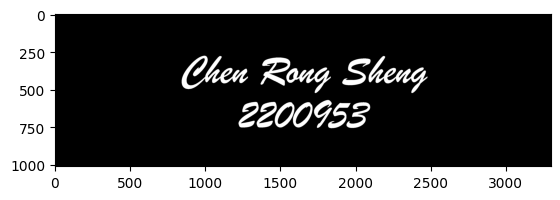

In [6]:
target = cv.imread("images/travel_hd.jpg")
src = cv.imread("images/watermark.png")

plt.imshow(src)
plt.show()

In [7]:
src = cv.resize(src, None, fx=0.7, fy=0.7)

h, w = target.shape[:2]
h_src, w_src = src.shape[:2]

In [8]:
overlay = np.zeros((h, w, 3), dtype=np.uint8)

overlay[h - h_src - 50: h - 50, 50: w_src + 50] = src

In [9]:
res = cv.addWeighted(overlay, 0.4, target, 1.0, 0)

cv.namedWindow("res", cv.WINDOW_NORMAL)
cv.imshow("res", res)
cv.waitKey(0)
cv.destroyAllWindows()